<a href="https://www.kaggle.com/code/kennethnjuguna/kenya-inflation-rate-from-2005-2023?scriptVersionId=148614610" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# This is a notebook Looking at Inflation Rate in the Country from the year 2005-2003
<ul>
    <li>Get the year with the highest inflation rate. </li>
    <li>Get the month with the highest inflation rate.</li>
</ul>

**Import the required python libraries to be used with the dataset.**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

**Import the inflation rate dataset.**

In [44]:
#we use pandas to import the required dataset for this EDA
kenyainflationrate=pd.read_csv('/kaggle/input/kenyainflation2005-2023/Inflation Rates.csv')

**View the first five rows of the dataset.**

In [45]:
#We use the head function to check the first five rows of the dataset
kenyainflationrate.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,July,8.68,7.28
1,2023,June,8.77,7.88
2,2023,May,8.78,8.03
3,2023,April,8.71,7.90
4,2023,March,8.59,9.19


**View the last rows of the dataset.**

In [46]:
#We use the tail function to check the last 5 rows of the dataset
kenyainflationrate.tail()

,Year,Month,Annual Average Inflation,12-Month Inflation
219,2005,May,14.61,14.78
220,2005,April,13.76,16.02
221,2005,March,13.07,14.15
222,2005,February,12.60,13.94
223,2005,January,12.27,14.87


**Get Detailed data info  of all attributes in the dataset**

In [47]:
#This function checks for detailed datatypes for each attribute
kenyainflationrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      224 non-null    int64  
 1   Month                     224 non-null    object 
 2   Annual Average Inflation  224 non-null    float64
 3   12-Month Inflation        224 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.1+ KB


**Check for duplicate values within the dataset.**

In [48]:
#This checks for duplicated values within the dataset
kenyainflationrate.duplicated().sum()

1

**Check for missing values within the Kenya Inflation Rate dataset.**

In [49]:
#This will check if the dataset has any missing values or data
missing_data=kenyainflationrate.isnull()
missing_data.head(5)

,Year,Month,Annual Average Inflation,12-Month Inflation
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


**Check in a sum function the total number of Null(missing values) within the dataset**

In [50]:
#You can as well use the code below to get any Null Values
kenyainflationrate.isnull().sum()

Year                        0
Month                       0
Annual Average Inflation    0
12-Month Inflation          0
dtype: int64

**Defining the shape of the dataset.**

In [51]:
#Determing the number of rows and columns within the dataset
kenyainflationrate.shape

(224, 4)

**Summarical statistics of the dataset**

In [52]:
# we use the decribe function to get the summarical statistics of the whole dataset
kenyainflationrate.describe()

,Year,Annual Average Inflation,12-Month Inflation
count,224.000000,224.000000,224.000000
mean,2013.821429,7.724286,7.594688
std,5.379273,3.383510,4.004110
min,2005.000000,3.930000,1.850000
25%,2009.000000,5.407500,5.000000
50%,2014.000000,6.465000,6.405000
75%,2018.250000,8.617500,8.462500
max,2023.000000,17.070000,19.720000


# <h4>Rename the columns.</h4>

In [53]:
kenyainflationrate.rename(columns = {'Annual Average Inflation':'Annual_Average_Inflation'}, inplace = True)

In [54]:
kenyainflationrate.rename(columns = {'12-Month Inflation':'12-Month_Inflation'}, inplace = True)

In [55]:
kenyainflationrate.head()

,Year,Month,Annual_Average_Inflation,12-Month_Inflation
0,2023,July,8.68,7.28
1,2023,June,8.77,7.88
2,2023,May,8.78,8.03
3,2023,April,8.71,7.90
4,2023,March,8.59,9.19


# Graphical representation of the above dataset.

**Visualize the corelation of the whole dataset**

/tmp/ipykernel_32/691368166.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(kenyainflationrate.corr())


<Axes: >

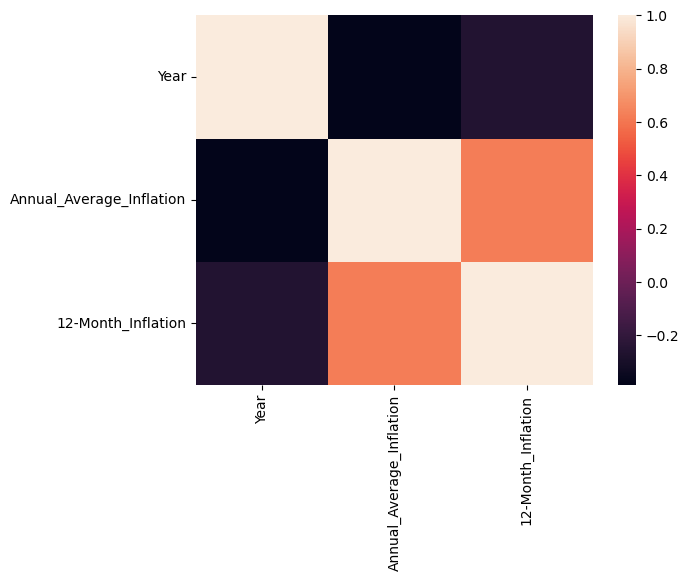

In [56]:
sns.heatmap(kenyainflationrate.corr())

**Let's compare the inflation rate of kenya in each year. We will do this by plotting a line graph of the inflation rate of the years on the same chart.**

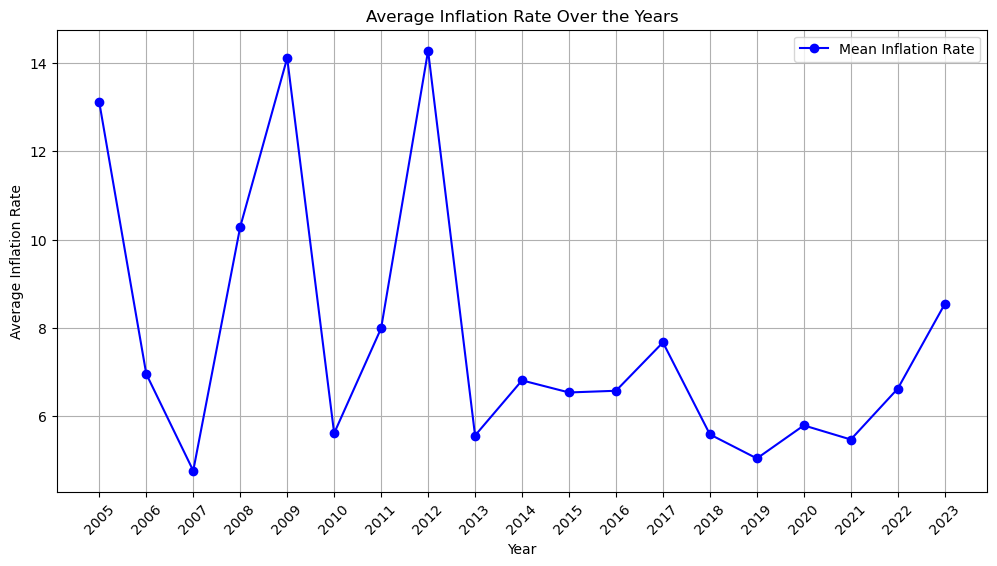

In [62]:
# Group the data by year and calculate the mean Inflation rate for each year
annual_Inflation_data = kenyainflationrate.groupby('Year')['Annual_Average_Inflation'].mean()

# Create a time series plot with years on the x-axis
years = annual_Inflation_data.index
prices = annual_Inflation_data.values

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(years, prices, label='Mean Inflation Rate', color='blue', marker='o')
plt.title('Average Inflation Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate')
plt.xticks(years, rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.grid(True)

# Display the plot
plt.show()